# Machine Learning 
## Store Performance Classification
### Project Objective: Develop classification models that will identify whether stores will perform well or poorly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory data analysis (EDA)

In [2]:
#display the first five rows of the Data set using the head() method
data = pd.read_csv("storedata.csv")
data.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [3]:
#information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

In [4]:
# select all integer columns
num_cols = data.select_dtypes("int")

# print the selected columns
num_cols

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
0,1437,9,18526,121,10,1288374,1138224,1006986,1002340,3,238,16,16
1,1544,8,18569,121,11,1086225,1015321,1012182,1008436,4,384,15,19
2,2039,-2,12288,105,12,1595638,1281661,1104490,1011395,11,219,13,18
3,2055,7,17092,117,14,1179395,1022959,1009496,1002169,5,261,15,12
4,2141,7,11307,103,18,1398558,1085170,1003137,1002513,7,200,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,96853,7,14120,110,13,1665074,1240813,1141898,1041041,6,202,18,14
132,96858,6,11205,103,15,1657769,1424404,1378708,1160929,5,203,13,18
133,98062,7,16190,115,19,1407456,1359511,1200486,1063718,7,341,18,18
134,98923,6,15516,113,17,1451087,1245725,1127276,1045154,11,261,14,10


In [5]:
# select all integer columns
cat_cols = data.select_dtypes("object")

# print the selected columns
cat_cols

,Town,Country,Manager name,Car park,Location,Performance
0,Swinton (Greater Manchester),UK,Roger,Yes,Retail Park,Good
1,Stamford,UK,Ella,Yes,Shopping Centre,Good
2,Skipton,UK,Valentina,No,Retail Park,Bad
3,Stratton,UK,Antonia,No,High Street,Bad
4,Shepperton,UK,Gabriel,No,Retail Park,Bad
...,...,...,...,...,...,...
131,South Benfleet,UK,Vit�ria,Yes,Retail Park,Bad
132,Sandy,UK,Mat�as,No,Shopping Centre,Bad
133,Sheerness,UK,Gustavo,No,Shopping Centre,Bad
134,Salford,UK,Rafael,No,High Street,Bad


I will now individually deal with the numerical columns and categorical columns, one at a time

##### Starting with the numerical columns

In [6]:
# displays the first five rows of the dataframe num_cols
num_cols.head()

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
0,1437,9,18526,121,10,1288374,1138224,1006986,1002340,3,238,16,16
1,1544,8,18569,121,11,1086225,1015321,1012182,1008436,4,384,15,19
2,2039,-2,12288,105,12,1595638,1281661,1104490,1011395,11,219,13,18
3,2055,7,17092,117,14,1179395,1022959,1009496,1002169,5,261,15,12
4,2141,7,11307,103,18,1398558,1085170,1003137,1002513,7,200,19,13


In [7]:
#displaying information about the "num_cols" variable
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Store ID            136 non-null    int64
 1   Staff               136 non-null    int64
 2   Floor Space         136 non-null    int64
 3   Window              136 non-null    int64
 4   Demographic score   136 non-null    int64
 5   40min population    136 non-null    int64
 6   30 min population   136 non-null    int64
 7   20 min population   136 non-null    int64
 8   10 min population   136 non-null    int64
 9   Store age           136 non-null    int64
 10  Clearance space     136 non-null    int64
 11  Competition number  136 non-null    int64
 12  Competition score   136 non-null    int64
dtypes: int64(13)
memory usage: 13.9 KB


There are 13 numerical columns in the dataset

However, not all of the columns are relevant for this analysis and model building. Therefore, the following numerical columns will be removed:
* Store ID

Only Store ID was removed as it is a unique number for each of the stores and will have no real effect on the analysis and model building, these are considered as noise in a dataset

##### Staff

In [8]:
#counting the number of occurrences of each value in the column "Staff" in a dataset
num_cols["Staff"].value_counts()

 7      29
 5      29
 6      29
 9      28
 8      18
-2       1
 300     1
 600     1
Name: Staff, dtype: int64

It can be seen here that the numerical column staff has an instance where the number of staff is -2, this is not possible, in real sense and will be replaced with the number 2, for the purpose of this analysis and model building

In [9]:
num_cols["Staff"] = num_cols["Staff"].apply(abs)

In [10]:
num_cols["Staff"].value_counts()

7      29
5      29
6      29
9      28
8      18
2       1
300     1
600     1
Name: Staff, dtype: int64

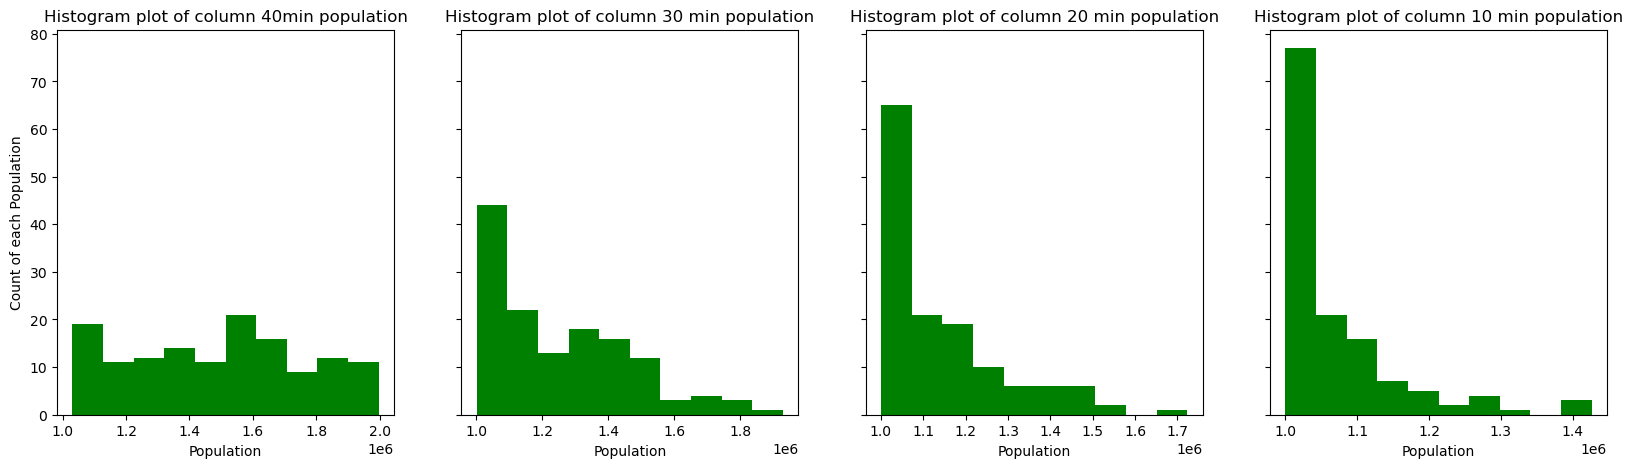

In [11]:
#plotting a histogram of four columns of population data from a dataframe
population_cols = ["40min population", "30 min population", "20 min population", "10 min population"]

fig, ax = plt.subplots(ncols=4, figsize=(20,5), sharey=True)
for idx, pop_col in enumerate(population_cols):
    ax[idx].hist(num_cols[pop_col], color="g")
    ax[idx].set_xlabel("Population")
    ax[0].set_ylabel("Count of each Population")
    ax[idx].title.set_text(f"Histogram plot of column {pop_col}")
plt.show()

It can be seen from the histogram above that:
* The plot of the 40 min population is almost a normal distribution
* The plot of the other plots (30 min, 20 min and 10 min) are skewed to the left, with the smallest population being the most common

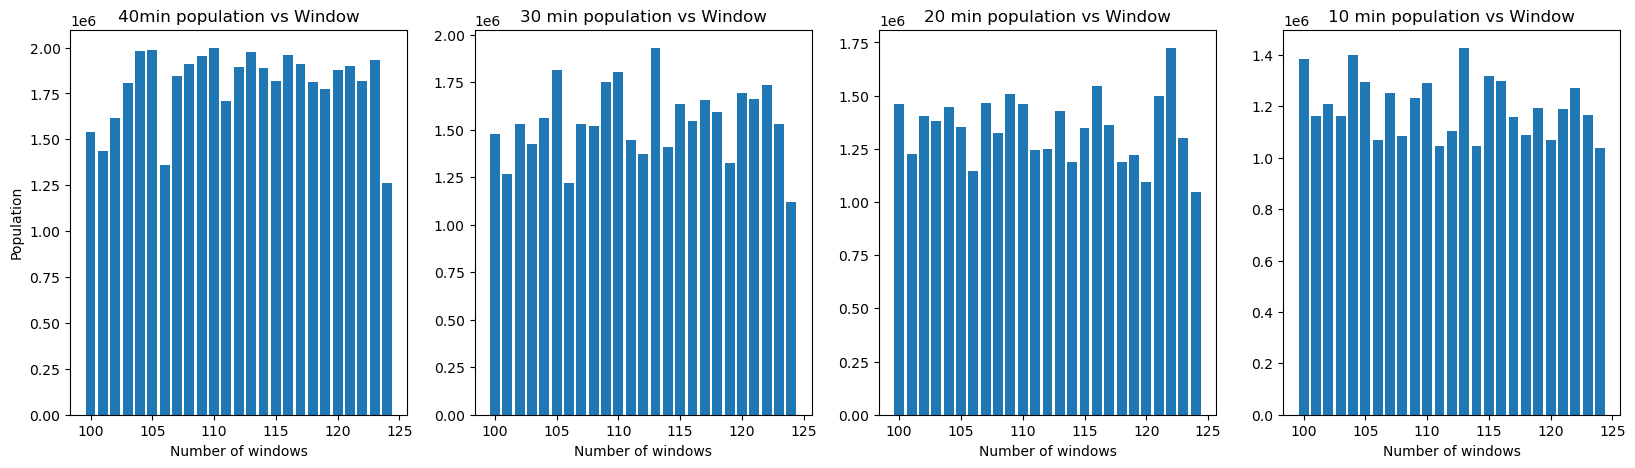

In [12]:
#creates a subplot with four columns and plots bar graphs of the population columns against the number of windows.
fig, ax = plt.subplots(ncols=4, figsize=(20,5))
for i, pop_col in enumerate(population_cols):
    ax[i].bar(num_cols["Window"],num_cols[pop_col])
    ax[i].title.set_text(f"{pop_col} vs Window")
    ax[i].set_xlabel("Number of windows")
    ax[0].set_ylabel("Population")
plt.show()

It can be observed from here that there may be no real connection between the number of windows in each store and the population for each of the recorded timeframe between (10 mins - 40 mins)

##### Now is the time to explore categorical columns

In [13]:
#displaying the first five rows of a dataframe with categorical columns
cat_cols.head()

,Town,Country,Manager name,Car park,Location,Performance
0,Swinton (Greater Manchester),UK,Roger,Yes,Retail Park,Good
1,Stamford,UK,Ella,Yes,Shopping Centre,Good
2,Skipton,UK,Valentina,No,Retail Park,Bad
3,Stratton,UK,Antonia,No,High Street,Bad
4,Shepperton,UK,Gabriel,No,Retail Park,Bad


In [14]:
#displaying information about the categorical columns of the data set
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Town          136 non-null    object
 1   Country       136 non-null    object
 2   Manager name  136 non-null    object
 3   Car park      136 non-null    object
 4   Location      136 non-null    object
 5   Performance   136 non-null    object
dtypes: object(6)
memory usage: 6.5+ KB


There are 6 categorical columns, making that a total of 19 columns in the dataset

In [15]:
num_country = cat_cols["Country"].nunique() #Count the number of unique locations in the "country" column
countries = cat_cols["Country"].unique() # Get the names of the unique locations

#Print the results
print(f"There are {num_country} locations in the dataset\n\nWhich are: {countries}")

There are 2 locations in the dataset

Which are: ['UK' 'France']


We can see that the shops are distributed in two countries, France and the United Kingdom, this may be important to the performance of the stores and sales are done differently in different countries

In [16]:
# count the number of occurrences of each unique value in the "country" column
cat_cols["Country"].value_counts()

UK        134
France      2
Name: Country, dtype: int64

Even though there are only two shops in France, we will still keep the column

In [17]:
#count the number of unique values in column 'Town'
cat_cols['Town'].nunique()

136

There are 136 towns, which means that each town has exactly only one store. This column will really say nothing about the dataset other than the fact that some are peforming bad while some are not<br>

Therefore I will drop this particular column `Town`

Also, the `Manager name` column has nothing to do with the performance of the store, hence, It will be dropped also

The `Car park` column is important to our dataset, as people may prefer to go to others stores with car park for convinience.

In [18]:
# count the number of occurrences of each unique value in the "car park" column
cat_cols["Car park"].value_counts()

Yes    94
No     35
Y       4
N       3
Name: Car park, dtype: int64

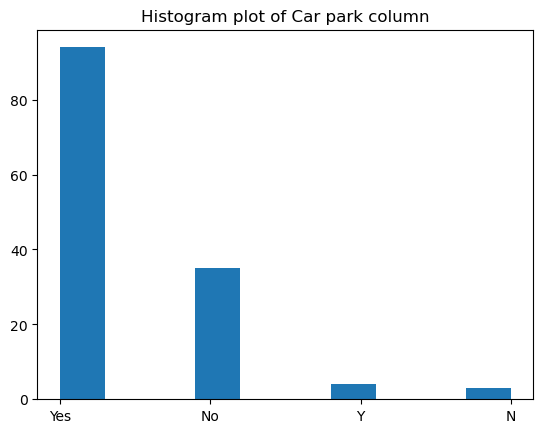

In [19]:
plt.hist(cat_cols["Car park"]) # Plot a histogram of the "car park" column
plt.title("Histogram plot of Car park column")# Set the title of the plot
plt.show() # Display the plot

This column (`Car park`) is expected to have only two unique classes, but there are four, inluding "Y" and "N", which should also mean "Yes" and "No". I will clean that up to make them the same, as they should be

In [20]:
def car_clean(clas):
    if len(clas) == 1 and clas.startswith("Y"):
        n_clas = clas.replace(clas, "Yes")
    elif len(clas) == 1 and clas.startswith("N"):
        n_clas = clas.replace(clas, "No")
    else:
        n_clas = clas
    return n_clas

In [21]:
cat_cols["Car park"] = cat_cols["Car park"].apply(car_clean)

In [22]:
cat_cols["Car park"].value_counts()

Yes    98
No     38
Name: Car park, dtype: int64

Now that looks more like it. We now have the two unique classes we are supposed to have

In [23]:
cat_cols["Location"].unique()

array(['Retail Park', 'Shopping Centre', 'High Street', 'Village'],
      dtype=object)

There are 4 unique Locations are each of the stores regardless of country and town can be in one of these four places:
* Retail Park
* Shopping Center
* High Street
* Village

Let's see how many of each of the Locations appears in the dataset

In [24]:
cat_cols["Location"].value_counts()

Shopping Centre    52
Retail Park        43
High Street        40
Village             1
Name: Location, dtype: int64

This column is important as different Locations have different attractions to them

Now, the `Performance` column<br>
This is our target column and the machine learning models will be built to make predictions  on this column

In [25]:
cat_cols["Performance"].unique()

array(['Good', 'Bad'], dtype=object)

This column is similar to the `Car park` column, as it has only two classes, "Good" and "Bad" and each instance can only be one the two classes<br>

This shows that our problem is a "Binary Classification" problem

In [26]:
cat_cols["Performance"].value_counts()

Good    69
Bad     67
Name: Performance, dtype: int64

This is a pretty much balanced class with 69 instances of "Good" and 67 instances of "Bad".<br>
The model should be able to predict well without bias.

The next step is to do label encoding on the categorical columns so that we can then use them for the model training<br>

A better explanation of this is to say, the `Car park` column with classes "Yes" and "No" is being represented with say 1 and 0 respectively.

# Data preprocessing

##### dropping
Now is the time to drop all the irrelevant columns from both the numerical columns and categorical columns 

In [27]:
num_cols = num_cols.drop(["Store ID"], axis=1)
cat_cols = cat_cols.drop(["Town", "Manager name", "Country"], axis=1)

In [28]:
num_cols.head()

,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
0,9,18526,121,10,1288374,1138224,1006986,1002340,3,238,16,16
1,8,18569,121,11,1086225,1015321,1012182,1008436,4,384,15,19
2,2,12288,105,12,1595638,1281661,1104490,1011395,11,219,13,18
3,7,17092,117,14,1179395,1022959,1009496,1002169,5,261,15,12
4,7,11307,103,18,1398558,1085170,1003137,1002513,7,200,19,13


In [29]:
cat_cols.head()

,Car park,Location,Performance
0,Yes,Retail Park,Good
1,Yes,Shopping Centre,Good
2,No,Retail Park,Bad
3,No,High Street,Bad
4,No,Retail Park,Bad


##### Label encoding the categorical columns

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # create a LabelEncoder object
cat_encoded = cat_cols.apply(le.fit_transform)
cat_encoded.head()

,Car park,Location,Performance
0,1,1,1
1,1,2,1
2,0,1,0
3,0,0,0
4,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create a StandardScaler object

In [32]:
# scale the numerical columns and create a new DataFrame
num_encoded = pd.DataFrame(scaler.fit_transform(num_cols), columns=num_cols.columns)

In [33]:
num_encoded.head()

,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
0,-0.077733,1.272666,1.305764,-1.558199,-0.712075,-0.518580,-0.859022,-0.720501,-1.258357,-0.473990,0.532708,0.404560
1,-0.095471,1.288293,1.305764,-1.209080,-1.435415,-1.089448,-0.824027,-0.651634,-0.901822,2.359104,0.186065,1.423453
2,-0.201897,-0.994355,-1.027030,-0.859962,0.387395,0.147665,-0.202337,-0.618206,1.593919,-0.842680,-0.507219,1.083822
3,-0.113208,0.751520,0.722566,-0.161724,-1.102029,-1.053970,-0.842117,-0.722433,-0.545288,-0.027680,0.186065,-0.953963
4,-0.113208,-1.350871,-1.318629,1.234751,-0.317808,-0.765009,-0.884945,-0.718546,0.167781,-1.211370,1.572634,-0.614332


It is seen that the label encoding is done and now we have to keep in mind that the encoding has considered `Good` as 1 and `Bad` as 0, which totally makes sense to me, in real sense

##### Merging

In [34]:
total_list = [num_encoded, cat_encoded]
total_df = pd.concat(total_list, axis=1)

In [35]:
total_df.head()

,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Car park,Location,Performance
0,-0.077733,1.272666,1.305764,-1.558199,-0.712075,-0.518580,-0.859022,-0.720501,-1.258357,-0.473990,0.532708,0.404560,1,1,1
1,-0.095471,1.288293,1.305764,-1.209080,-1.435415,-1.089448,-0.824027,-0.651634,-0.901822,2.359104,0.186065,1.423453,1,2,1
2,-0.201897,-0.994355,-1.027030,-0.859962,0.387395,0.147665,-0.202337,-0.618206,1.593919,-0.842680,-0.507219,1.083822,0,1,0
3,-0.113208,0.751520,0.722566,-0.161724,-1.102029,-1.053970,-0.842117,-0.722433,-0.545288,-0.027680,0.186065,-0.953963,0,0,0
4,-0.113208,-1.350871,-1.318629,1.234751,-0.317808,-0.765009,-0.884945,-0.718546,0.167781,-1.211370,1.572634,-0.614332,0,1,0


##### Splitting into training data, validation data and test data

In [36]:
from sklearn.model_selection import train_test_split

Using 10% of the data for testing later and using 

In [37]:
train_df, test_val_df = train_test_split(total_df, test_size=0.35, random_state=1)
test_df, val_df = train_test_split(test_val_df, test_size=0.7, random_state=1)

In [38]:
print(f"The training data has shape: {train_df.shape}")
print(f"The validation data has shape: {val_df.shape}")
print(f"The test data has shape {test_df.shape}")

The training data has shape: (88, 15)
The validation data has shape: (34, 15)
The test data has shape (14, 15)


The above splitting is using 60% of the data as training data and using 20% each for both the validation and testing data

In [39]:
X_train = train_df.copy()
y_train = X_train.pop("Performance")

In [40]:
X_val = val_df.copy()
y_val = X_val.pop("Performance")

In [41]:
X_test = test_df.copy()
y_test = X_test.pop("Performance")

Now that all we have is numbers and we now have our training data, validation data and test data, we can proceed to building our models

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.fit_transform(X_val)
X_test_norm = scaler.fit_transform(X_test)

# Model building

In [44]:
#fit and predict the model

def fit_and_predict(model):
    model.fit(X_train_norm, y_train)
    preds = model.predict(X_val_norm)
    return preds

def get_preds_df(model):
    preds = fit_and_predict(model)
    preds_df = pd.DataFrame({
        "Actual": y_val,
        "Predicted": preds
    })
    return preds_df

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
def get_accuracy(model):
    preds = fit_and_predict(model)
    acc_score = accuracy_score(y_val, y_pred=preds)
    return acc_score


def get_precision_and_recall(model):
    preds = fit_and_predict(model)
    pre_score, rec_score = precision_score(y_val, y_pred=preds), recall_score(y_val, y_pred=preds)
    return pre_score, rec_score


def get_f1_and_conf_mtrx(model):
    preds = fit_and_predict(model)
    f1, conf_mtrx = f1_score(y_val, y_pred=preds), confusion_matrix(y_val, y_pred=preds)
    return f1, conf_mtrx

In [46]:
def get_feature_weight(model):
    weights = model.coef_
    features = X_train.columns
    weight_df = pd.DataFrame({
        "Columns":features,
        "Weights":weights[0]
    })
    return weight_df


def plot_weights(model):
    df = get_feature_weight(model)
    df.plot(x="Columns", y="Weights", kind="barh")
    plt.show()

##### Logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
#creating a logistic regression model and then getting predictions from it using the get_preds_df() function.
logreg_model = LogisticRegression() 
preds_df_logreg = get_preds_df(logreg_model)

In [49]:
preds_df_logreg.head()

,Actual,Predicted
62,0,1
31,0,1
111,0,0
2,0,0
93,0,0


In [50]:
get_feature_weight(logreg_model)

,Columns,Weights
0,Staff,0.298024
1,Floor Space,0.250952
2,Window,0.433510
3,Demographic score,-0.389698
4,40min population,-0.817748
5,30 min population,0.116720
6,20 min population,0.346550
7,10 min population,0.331148
8,Store age,-0.192179
9,Clearance space,0.033569


Weight plot for logistic regression model


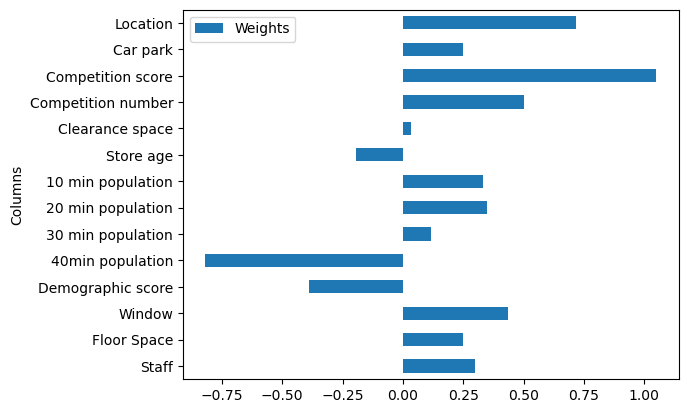

In [51]:
print("Weight plot for logistic regression model")
plot_weights(logreg_model)

In [52]:
get_accuracy(logreg_model)

0.6764705882352942

In [53]:
get_precision_and_recall(logreg_model)

(0.65, 0.7647058823529411)

In [54]:
get_f1_and_conf_mtrx(logreg_model)

(0.7027027027027027,
 array([[10,  7],
        [ 4, 13]], dtype=int64))

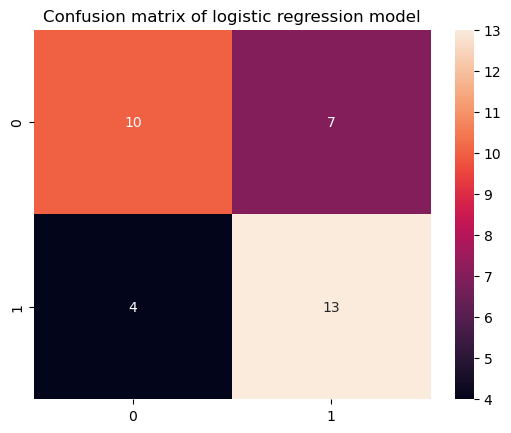

In [55]:
# Assuming that logreg_model is a trained logistic regression model
f1, conf_mat = get_f1_and_conf_mtrx(logreg_model)
plt.title("Confusion matrix of logistic regression model")
sns.heatmap(conf_mat, annot=True)
plt.show()

##### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier model
dtc_model = DecisionTreeClassifier()
preds_df_dtc = get_preds_df(dtc_model)
preds_df_dtc.head()

,Actual,Predicted
62,0,0
31,0,0
111,0,0
2,0,0
93,0,0


In [57]:
#creating a dataframe that stores the feature importance weights for each column in the training set X_train
weights_dtc = dtc_model.feature_importances_
features = X_train.columns
weight_df_dtc = pd.DataFrame({
        "Columns":features,
        "Weights":weights_dtc
    })
weight_df_dtc

,Columns,Weights
0,Staff,0.146764
1,Floor Space,0.000000
2,Window,0.022833
3,Demographic score,0.055181
4,40min population,0.102153
5,30 min population,0.000000
6,20 min population,0.030445
7,10 min population,0.071960
8,Store age,0.024356
9,Clearance space,0.071807


Weight plot for decision tree model


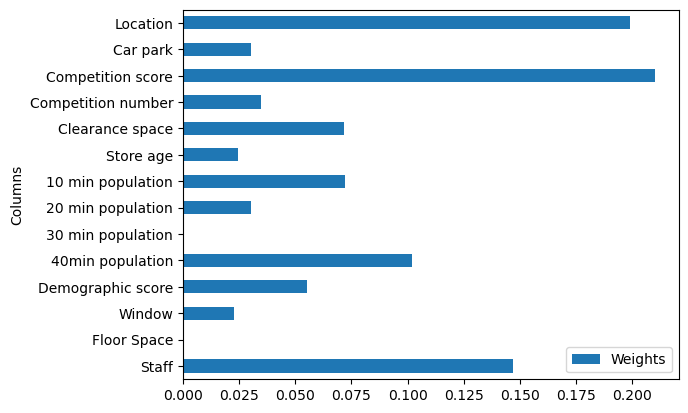

In [58]:
print("Weight plot for decision tree model")
weight_df_dtc.plot(x="Columns", y="Weights", kind="barh")
plt.show()

In [59]:
get_accuracy(dtc_model)

0.6764705882352942

In [60]:
get_precision_and_recall(dtc_model)

(0.6875, 0.6470588235294118)

In [61]:
get_f1_and_conf_mtrx(dtc_model)

(0.6875,
 array([[13,  4],
        [ 6, 11]], dtype=int64))

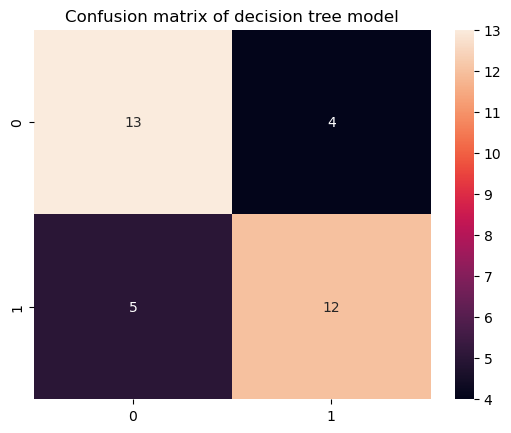

In [62]:
f1, conf_mat = get_f1_and_conf_mtrx(dtc_model)
plt.title("Confusion matrix of decision tree model")
sns.heatmap(conf_mat, annot=True)
plt.show()

##### Neural network

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

In [64]:
#creates a neural network model using the Sequential approach
nn_model = Sequential()

nn_model.add(Input(shape=(X_train.shape[1:])))


nn_model.add(Dense(16, activation="relu"))
nn_model.add(Dropout(0.4))


nn_model.add(Dense(16, activation="relu"))
nn_model.add(Dropout(0.4))


nn_model.add(Dense(8, activation="relu"))
nn_model.add(Dropout(0.4))


nn_model.add(Dense(1, activation="sigmoid"))


es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
nn_model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history = nn_model.fit(X_train_norm, np.array(y_train), validation_data=(X_val_norm, y_val), batch_size=5, epochs=50, callbacks=[es_callback])

Epoch 1/50
18/18 [==============================] - 3s 34ms/step - loss: 0.7656 - accuracy: 0.4886 - val_loss: 0.7524 - val_accuracy: 0.4118
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.8753 - accuracy: 0.4886 - val_loss: 0.7420 - val_accuracy: 0.3824
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: 0.7677 - accuracy: 0.4545 - val_loss: 0.7335 - val_accuracy: 0.4412
Epoch 4/50
18/18 [==============================] - 0s 9ms/step - loss: 0.8067 - accuracy: 0.3864 - val_loss: 0.7279 - val_accuracy: 0.4412
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.7465 - accuracy: 0.4773 - val_loss: 0.7217 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.7307 - accuracy: 0.5455 - val_loss: 0.7163 - val_accuracy: 0.3824
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.7737 - accuracy: 0.5114 - val_loss: 0.7095 - val_accuracy: 0.4706
Epoch 8/50
18/18 [=

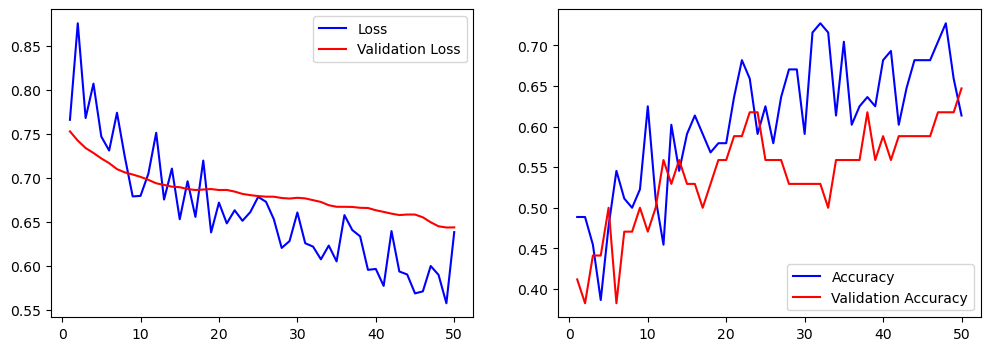

In [66]:
#plotting two graphs showing the loss and accuracy of the model after each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,1+len(loss))
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))
ax1.plot(epochs,loss,'b',label='Loss')
ax1.plot(epochs,val_loss,'r',label='Validation Loss')
ax1.legend()

ax2.plot(epochs,acc,'b',label='Accuracy')
ax2.plot(epochs,val_acc,'r',label='Validation Accuracy')
ax2.legend()

plt.show()

In [67]:
nn_preds = np.round(nn_model.predict(X_test_norm)).astype("int8")

1/1 [==============================] - 0s 222ms/step


In [68]:
nn_preds

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int8)

In [69]:
y_test

56     0
17     0
54     0
36     1
33     0
42     0
115    1
108    0
119    1
120    0
53     1
44     1
95     0
39     0
Name: Performance, dtype: int32

In [70]:
accuracy_score(nn_preds, y_test)

0.5714285714285714

In [71]:
precision_score(nn_preds, y_test), recall_score(nn_preds, y_test)

(0.8, 0.4444444444444444)

In [72]:
f1_score(nn_preds, y_test)

0.5714285714285714

In [73]:
conf_mat = confusion_matrix(nn_preds, y_test)

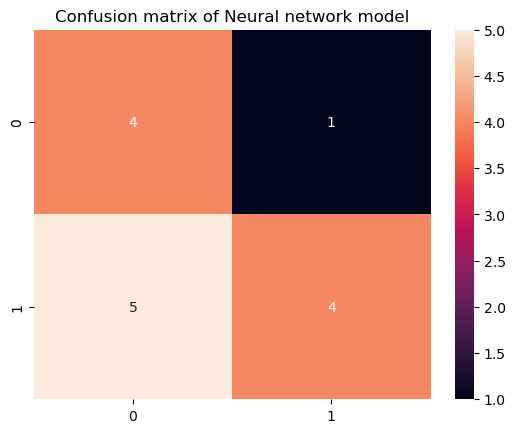

In [74]:
sns.heatmap(conf_mat, annot=True)
plt.title("Confusion matrix of Neural network model")
plt.show()

# Hyperparameter Tuning Using GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [76]:
def hyper_tune(grid, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid_model = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
    grid_result = grid_model.fit(X_train_norm, y_train)
    
    return grid_result

##### Hyperparameter tuning for Logistic Regression

In [77]:
#defining a grid search for hyperparameter tuning for a Logistic Regression model
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10.]
grid_logreg = {
    "solver":solvers,
    "penalty":penalty,
    "C": c_values
}

logreg_grid_result = hyper_tune(grid_logreg, LogisticRegression())

In [78]:
logreg_grid_result.best_params_

{'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [79]:
tuned_logreg = LogisticRegression(solver="newton-cg", C=10., penalty="l2")
tuned_logreg.fit(X_train_norm, y_train)

tuned_preds_df_logreg = get_preds_df(tuned_logreg)

In [80]:
tuned_preds_df_logreg.head()

,Actual,Predicted
62,0,0
31,0,1
111,0,0
2,0,0
93,0,1


In [81]:
get_accuracy(tuned_logreg)

0.7647058823529411

In [82]:
get_precision_and_recall(tuned_logreg)

(0.7142857142857143, 0.8823529411764706)

In [83]:
get_f1_and_conf_mtrx(tuned_logreg)

(0.7894736842105262,
 array([[11,  6],
        [ 2, 15]], dtype=int64))

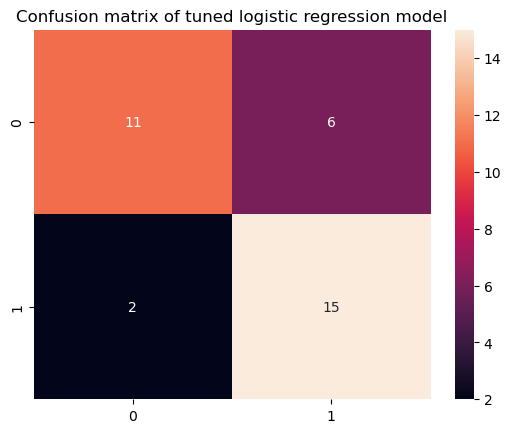

In [84]:
f1, conf_mat = get_f1_and_conf_mtrx(tuned_logreg)
plt.title("Confusion matrix of tuned logistic regression model")
sns.heatmap(conf_mat, annot=True)
plt.show()

It can be seen, obiviously that the model is doing well after hyperparameter tuning, on all forms of metrics

##### Hyperparameter tuning for Decison Tree Classifier

In [85]:
#defining a grid search for hyperparameter tuning for a Decison Tree Classifier
hyperparam = {
              'max_depth':list(range(1,21,4)),
              'min_samples_split':[7,2,5,2],
              'min_samples_leaf':[4,8,6,8],
              'max_features':[None,'log2',None]
              }
dtc_grid_result = hyper_tune(hyperparam, DecisionTreeClassifier())

In [86]:
dtc_grid_result.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 7}

In [87]:
tuned_dtc = DecisionTreeClassifier(max_depth=5, max_features=None, min_samples_leaf=8, min_samples_split=5)
tuned_dtc.fit(X_train_norm, y_train)

tuned_dtc_preds_df = get_preds_df(tuned_dtc)

In [88]:
tuned_dtc_preds_df.head()

,Actual,Predicted
62,0,0
31,0,1
111,0,0
2,0,0
93,0,0


In [89]:
get_accuracy(tuned_dtc)

0.7058823529411765

In [90]:
get_precision_and_recall(tuned_dtc)

(0.6842105263157895, 0.7647058823529411)

In [91]:
get_f1_and_conf_mtrx(tuned_dtc)

(0.7222222222222222,
 array([[11,  6],
        [ 4, 13]], dtype=int64))

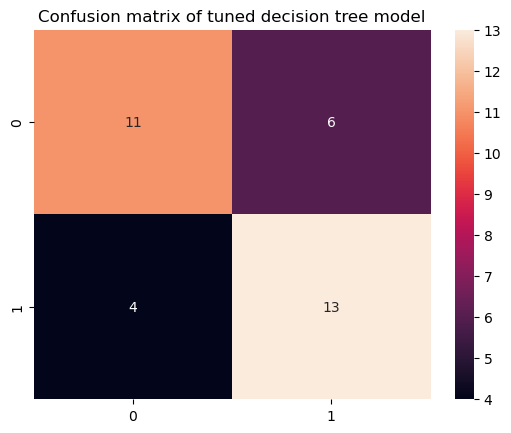

In [92]:
f1, conf_mat = get_f1_and_conf_mtrx(tuned_dtc)
plt.title("Confusion matrix of tuned decision tree model")
sns.heatmap(conf_mat, annot=True)
plt.show()

I would say this also got better after the hyperparameter tuning, as it has correctly predicted two instances more, correctly than the model before the hyperparameter tuning

# Insights, recommendations and conclusion

### Insights

The following insights can be derived from the whole analysis and model building
* There are exactly 136 data points in the dataset
* There are exactly 19 features in the data set but we eventually used only 16 of them (target column inclusive)
* The other columns (features) were dropped due to reasons that include, but not limited to, uniqueness, irrelevance to the analysis and model buiding
* The dataset has no null value, so none of the rows(datapoints) were dropped
* The problem being looked into is a binary classification problem (meaning, preiction on two distinct classes)
* The dataset is small and does not really provide enough information about the whole situation. But, half bread, they say is better than none
* The dataset was further sub-divided into three parts (training data, validation data and testing data)
* Without standard scaling, the models would not have done so well. So, standard scaling was introduced
* The logistic Regression model got the following value on the evaluated metrics:
    * 0.6765 for the accuracy
    * (0.65, 0.7647) for precision and recall
    * 0.7027 for f1 score
* The decision tree model got the following value on the evaluated metrics:
    * 0.7059 for the accuracy
    * (0.7059, 0.7059) for precision and recall
    * 0.6667 for f1 score
* The Neural network model got the following value on the evaluated metrics:
    * 0.714 for the accuracy
    * (0.8, 0.57) for precision and recall
    * 0.6667 for f1 score
* In the logistic regression model, the most important feature was `competition score` and the least important is `clearance space`
* In the decision tree model, the most important feature was also the `competition score` and the least important cannot be easily given to any of the other features as three features `(store age, window and floor space)` all got 0 as their `score of importance`
* Another metric to take note of is the confusion matrix, it is a measure used in classification problems to see how well a model is predicting each class correctly
    * As we can see, it has four sections, namely: TP (true positive), TN (true negative), FP (false positive) and FN (false negative).
    * The main diagonal from the top left corner down to the bottom right corner contains the correctly classes
    * The remaining two sections contains the mis-classified ones
* A heatmap from the seaborn module was used to visualize our confusion matrix

### Recommendations

* All features are important, however, the shop owner must be concerned about the competition score as it weight the most in both models
* The Logistic regression model is the better performing model, this makes it evident that the linear relationship in the data is quite good, especially the tuned logistic regression model
* I do not recommend using the neural network model as it is prone to overfitting (most likely due to the small size of the data)
* The most important metrics to look after is the f1 score and confusion matrix (both)
* I would recommend that the shop owner obtain more data about the store
* The things I would recommend they look into is the quality score of product (as compared to the best performing store, or the better performing ones), average income of people living in each of those towns, rather than just the names of the towns

### Conclusion

In general, the machine learning models are not doing so well with the dataset as the size is small, but it is still a very good measure of tracking the performance of each of the stores